# L1 regression of mean energy consumption

In [1]:
 # data and numbers
import numpy as np
import pandas as pd
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

import pandas as pd
from sklearn import preprocessing

In [2]:
path_raw = "..//data//meters//raw//"
path_meta = "..//data//metadata//"
path_cleaned = "..//data//meters//cleaned//"

In [3]:
columns_to_use = [
    "building_id",
    "site_id",
    "sqm",
    "lat",
    "lng",
    "timezone",
    "industry",
    "subindustry",
    "heatingtype",
    "yearbuilt",
    "date_opened",
    "numberoffloors",
]

In [8]:
meta = pd.read_csv(
    path_meta + "metadata.csv",
    usecols=columns_to_use,
    index_col="building_id"
)

# Preprocess metadata
meta = pd.get_dummies(meta, columns=['site_id', 'timezone', 'industry', 'subindustry', 'heatingtype'])
meta['date_opened'] = pd.to_datetime(meta['date_opened'])
meta['building_age'] = (pd.Timestamp.now() - meta['date_opened']).astype('<m8[Y]')


# Load sensor data
def import_data(metername):
    path_cleaned = "..//data//meters//cleaned//"
    df = pd.read_csv(path_cleaned + metername + ".csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df.set_index("timestamp", inplace=True)
    return df

sensor_data = import_data("electricity_cleaned")



Percentage of missing values in each column:
Panther_parking_Lorriane     19.277246
Panther_lodging_Cora         19.100547
Panther_office_Hannah        19.322845
Panther_lodging_Hattie       19.311446
Panther_education_Teofila    19.311446
                               ...    
Mouse_lodging_Vicente         9.439124
Mouse_health_Justin           9.536024
Mouse_health_Ileana          10.379617
Mouse_health_Estela           9.450524
Mouse_science_Micheal        58.663931
Length: 1578, dtype: float64


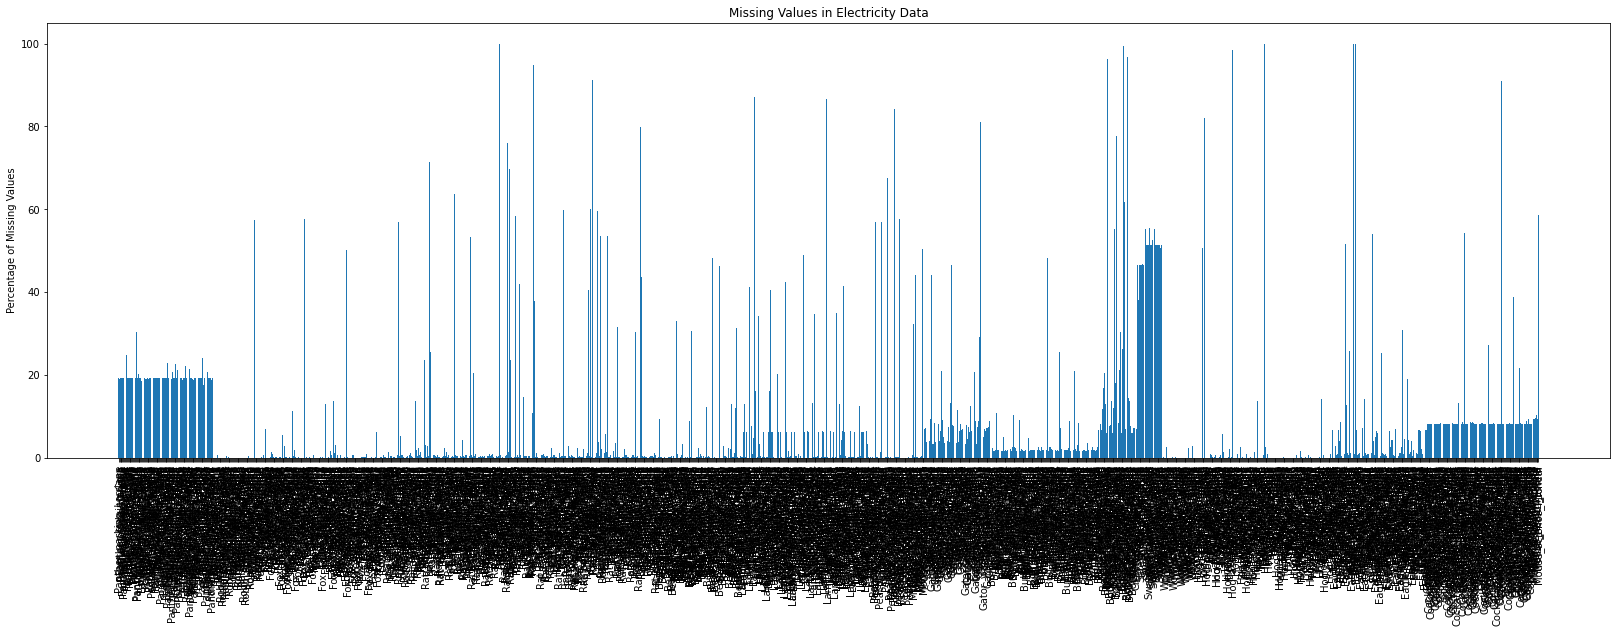

In [12]:
# Analyze missing values
missing_percentages = sensor_data.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentages)

# Visualize missing values
plt.figure(figsize=(28, 8))
plt.bar(missing_percentages.index, missing_percentages.values)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Electricity Data")
plt.show()



In [13]:
#get rid of the data that has more than 20% missing values
sensor_data = sensor_data.loc[:, sensor_data.isnull().mean() < 0.2]

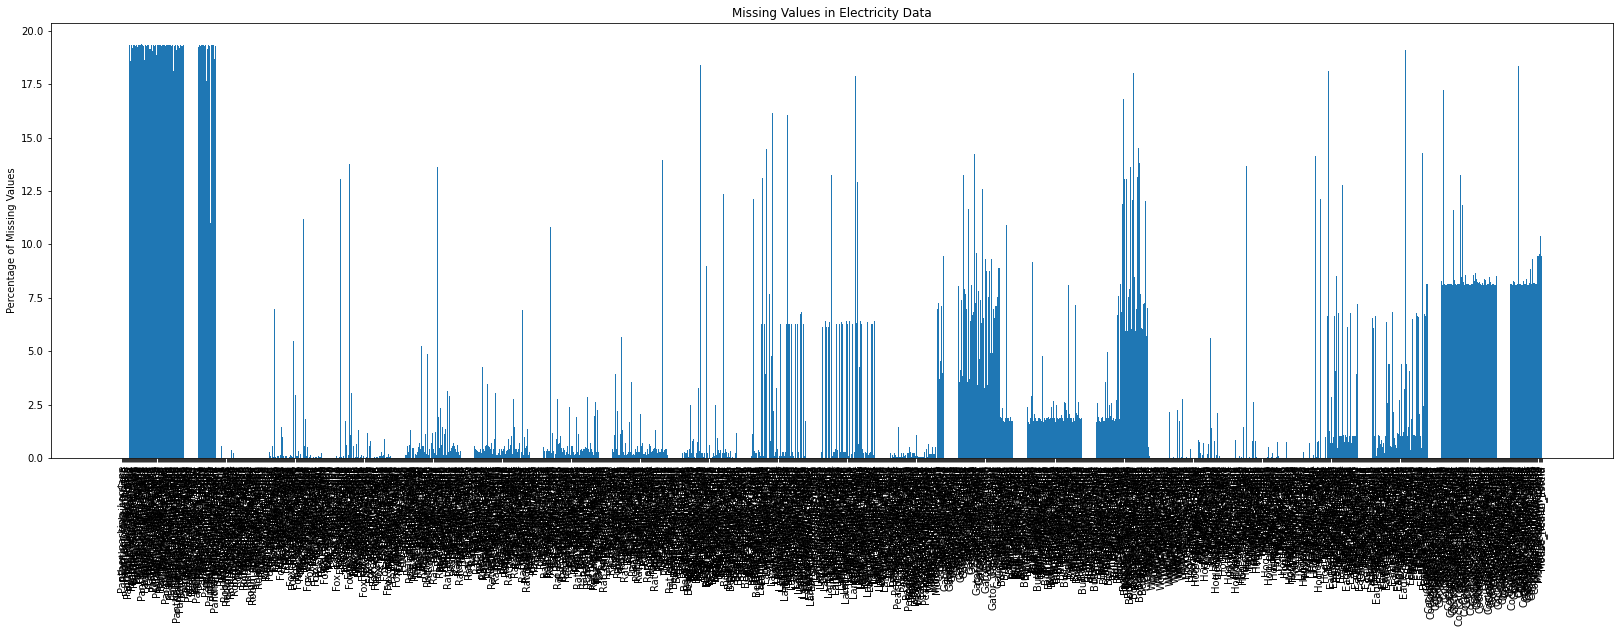

In [14]:
#plot the data again
plt.figure(figsize=(28, 8))
plt.bar(sensor_data.columns, sensor_data.isnull().mean() * 100)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Electricity Data")
plt.show()


Start of valid timestamps in each column:
Panther_parking_Lorriane    2016-02-01 03:00:00
Panther_lodging_Cora        2016-01-02 19:00:00
Panther_office_Hannah       2016-05-01 19:00:00
Panther_lodging_Hattie      2016-02-17 22:00:00
Panther_education_Teofila   2016-05-01 19:00:00
                                    ...        
Mouse_health_Modesto        2016-01-01 00:00:00
Mouse_lodging_Vicente       2016-01-01 00:00:00
Mouse_health_Justin         2016-01-01 00:00:00
Mouse_health_Ileana         2016-01-01 00:00:00
Mouse_health_Estela         2016-01-01 00:00:00
Length: 1400, dtype: datetime64[ns]
Percentage of valid timestamps in each column:
Panther_parking_Lorriane      4.258109
Panther_lodging_Cora          0.245112
Panther_office_Hannah        16.661916
Panther_lodging_Hattie        6.555321
Panther_education_Teofila    16.661916
                               ...    
Mouse_health_Modesto          0.000000
Mouse_lodging_Vicente         0.000000
Mouse_health_Justin           0.000

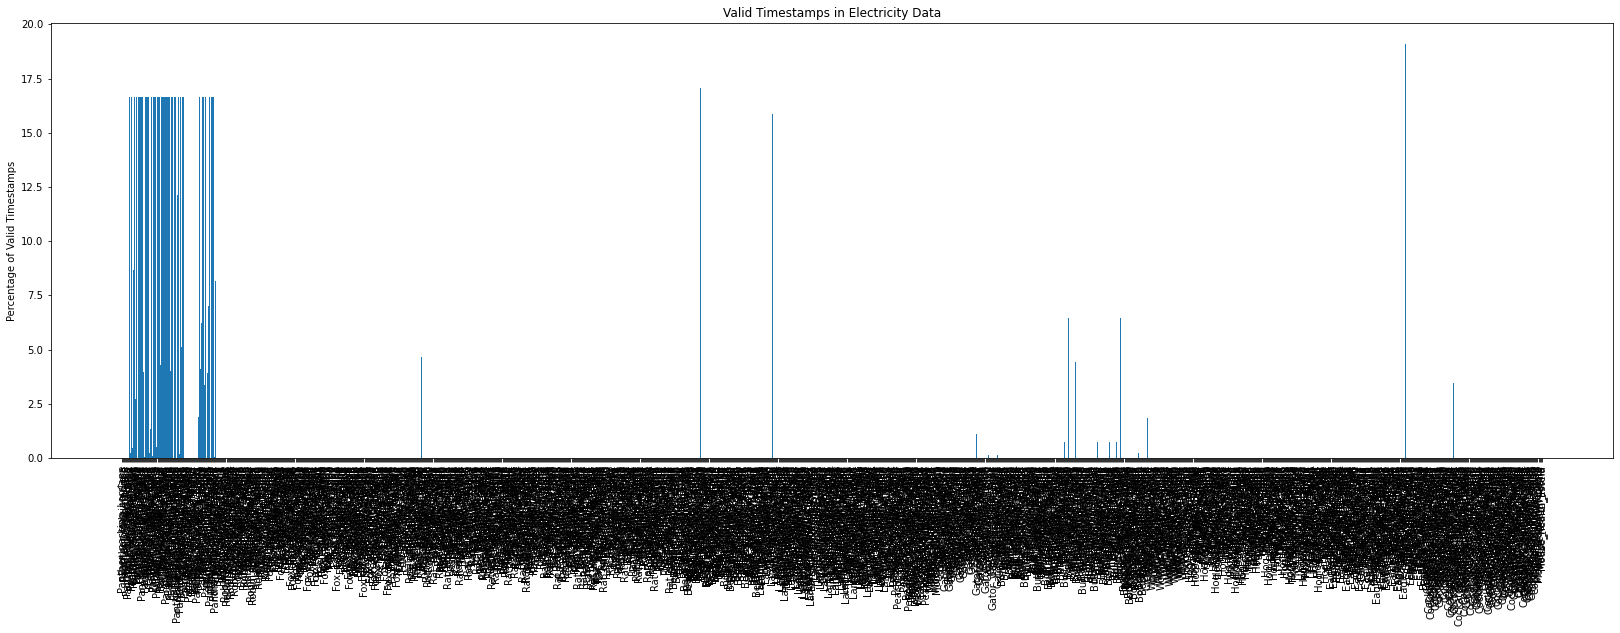

In [17]:
# in each column check the start of timestemp when its not nan value and caculate the percentage of valid timestamps
valid_timestamps = sensor_data.apply(lambda x: x.first_valid_index())
valid_timestamps = valid_timestamps.dropna()
valid_percentages = (valid_timestamps - sensor_data.index[0]) / (sensor_data.index[-1] - sensor_data.index[0]) * 100
#print the start of valid timestamps
print("Start of valid timestamps in each column:")
print(valid_timestamps)
#print the percentage of valid timestamps
print("Percentage of valid timestamps in each column:")
print(valid_percentages)

#plot the data
plt.figure(figsize=(28, 8))
plt.bar(valid_percentages.index, valid_percentages.values)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Valid Timestamps")
plt.title("Valid Timestamps in Electricity Data")
plt.show()


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Lasso model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("True vs Predicted Energy Consumption")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(lasso_model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

In [5]:
mean_sensor_data = sensor_data.mean()
mean_sensor_data.info()
print(mean_sensor_data)

<class 'pandas.core.series.Series'>
Index: 1578 entries, Panther_parking_Lorriane to Mouse_science_Micheal
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1572 non-null   float64
dtypes: float64(1)
memory usage: 24.7+ KB
Panther_parking_Lorriane      10.722723
Panther_lodging_Cora         135.054565
Panther_office_Hannah          6.683938
Panther_lodging_Hattie       140.593488
Panther_education_Teofila    156.466222
                                ...    
Mouse_lodging_Vicente         45.767561
Mouse_health_Justin          783.350343
Mouse_health_Ileana           43.587324
Mouse_health_Estela          384.684218
Mouse_science_Micheal        435.844964
Length: 1578, dtype: float64


In [6]:
# add mean_sensor_data as column to train_meta by index
print("Train")
train['mean_sensor_data'] = mean_sensor_data
train.info()

print("Test")
test['mean_sensor_data'] = mean_sensor_data
test.info()

Train
<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, Lamb_education_Camille to Bear_education_Sharon
Data columns (total 80 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   sqm                                                240 non-null    float64
 1   lat                                                240 non-null    float64
 2   lng                                                240 non-null    float64
 3   yearbuilt                                          240 non-null    float64
 4   numberoffloors                                     240 non-null    float64
 5   site_id_Bear                                       240 non-null    uint8  
 6   site_id_Bobcat                                     240 non-null    uint8  
 7   site_id_Bull                                       240 non-null    uint8  
 8   site_id_Cockatoo                                  

c:\Users\qwero\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.090e+05, tolerance: 1.246e+03
  model = cd_fast.enet_coordinate_descent(


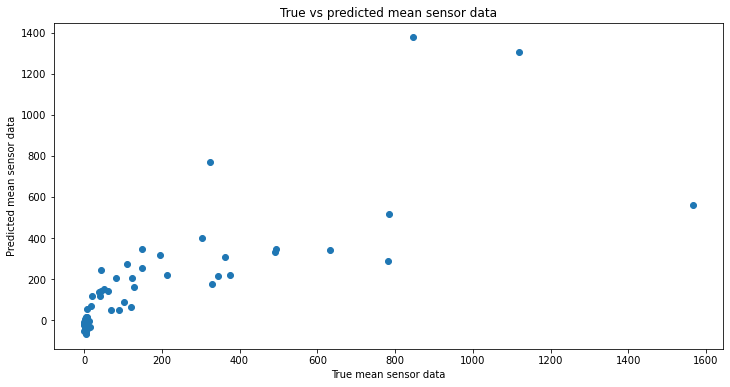

In [7]:
# drop NaN values
train.dropna(inplace=True)
test.dropna(inplace=True)

# Train linear regression model using L1 regularization on dataframe train, where column mean_sensor_data is the target
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train.drop(columns=["mean_sensor_data"]), train["mean_sensor_data"])

# Predict mean_sensor_data on test
test["predicted_mean_sensor_data"] = lasso_model.predict(test.drop(columns=["mean_sensor_data"]))
test["predicted_mean_sensor_data"].head()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(test["mean_sensor_data"], test["predicted_mean_sensor_data"])
plt.xlabel("True mean sensor data")
plt.ylabel("Predicted mean sensor data")
plt.title("True vs predicted mean sensor data")
plt.show()
